# Regression and Other Stories: Simple regression

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

### Fitting a regression using a data frame in python

#### Simulate fake data

In [88]:
np.random.seed(1234)

# R is one indexed
x = np.arange(1, 21)
n = x.shape
a = .2
b = .3
sigma = .5
y = a + b*x + sigma*stats.norm().rvs(n)

In [91]:
fake = pd.DataFrame(dict(x=x, y=y))

#### Linear regression model

In [97]:
model = smf.ols('y ~ x', data=fake)
results = model.fit()
coefs = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     181.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           7.67e-11
Time:                        08:14:52   Log-Likelihood:                -15.918
No. Observations:                  20   AIC:                             35.84
Df Residuals:                      18   BIC:                             37.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2433      0.263      0.926      0.366      -0.308       0.795
x              0.2953      0.022     13.472      0.000       0.249       0.341
==============================================================================
Omnibus:                        1.838   Durbin-Watson:                   2.433
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.551
Skew:                          -0.578   Prob(JB):                        0.460
Kurtosis:                       2.276   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot for book

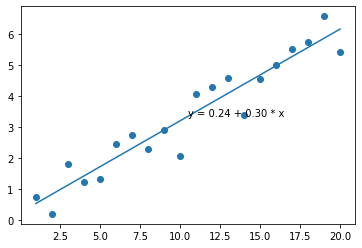

In [99]:
a_hat = coefs.loc['Intercept']
b_hat = coefs.loc['x']

fig, ax = plt.subplots()
ax.plot(x, a_hat+b_hat*x)
ax.scatter(x, y)

x_bar = x.mean()
ax.text(x_bar, a_hat+b_hat*x_bar,
       f"y = {a_hat:.2f} + {b_hat:.2f} * x");

### Formulating comparisons as regression models

#### SImulate fake data

In [100]:
np.random.seed(1234)

n_0 = 20
y_0 = stats.norm(2, 5).rvs(n_0)
fake_0 = pd.DataFrame(dict(y_0=y_0))
print(y_0)

[ 4.35717582 -3.95487847  9.16353484  0.43674052 -1.60294367  6.4358147
  6.29794207 -1.18261752  2.07848186 -9.21342477  7.75017862  6.95973011
  6.76662064 -8.1062741   0.32961317  2.01059182  4.02726706  3.4454597
  8.60579096 -5.73452777]


In [101]:
np.round(y_0.mean(), 2)

1.94

In [102]:
np.round(y_0.std() /np.sqrt(n_0), 2)

1.2

#### Estimating the mean is the same as regressing on a constant term

In [31]:
model = smf.ols('y_0 ~ 1', data=fake_0)
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.9435,1.232,1.578,0.131,-0.635,4.522


#### Estimating a difference is the same as regressing on an indicator variable

In [103]:
np.random.seed(1234)

n_1 = 30
y_1 = stats.norm(8, 5).rvs(n_1)
diff = y_1.mean() - y_0.mean()
se_0 = y_0.std() / np.sqrt(n_0)
se_1 = y_1.std() / np.sqrt(n_1)
se = np.sqrt(se_0** 2 + se_1**2)
np.round(diff, 2)

6.1

In [104]:
np.round(se, 2)

1.52

In [116]:
y = np.hstack((y_0, y_1))
x = np.repeat([0, 1], [n_0, n_1])
fake_1 = pd.DataFrame(dict(x=x, y=y))

model = smf.ols('y ~ x', data=fake_1)
results = model.fit()
coefs = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     15.92
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           0.000225
Time:                        08:21:44   Log-Likelihood:                -153.26
No. Observations:                  50   AIC:                             310.5
Df Residuals:                      48   BIC:                             314.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9435      1.184      1.642      0.107      -0.437       4.324
x              6.0974      1.528      3.989      0.000       3.024       9.170
==============================================================================
Omnibus:                        3.984   Durbin-Watson:                   2.497
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.684
Skew:                          -0.598   Prob(JB):                        0.158
Kurtosis:                       2.418   Cond. No.                         2.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot for the book

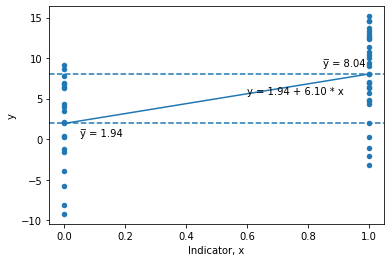

In [113]:
fig, ax = plt.subplots()

a_hat = coefs.loc['Intercept']
b_hat = coefs.loc['x']
y_0_bar = fake_1.loc[fake_1['x'] == 0, 'y'].mean()
y_1_bar = fake_1.loc[fake_1['x'] == 1, 'y'].mean()
x_bar = x.mean()

ax.plot(x, a_hat+b_hat*x)
fake_1.plot.scatter(x='x', y='y', ax=ax)
ax.axhline(y=y_0_bar, linestyle='--')
ax.axhline(y=y_1_bar, linestyle='--')


ax.text(x_bar, a_hat+b_hat*x_bar, f"y = {a_hat:.2f} + {b_hat:.2f} * x")
ax.text(0.05, y_0_bar-1.6, f"y̅ = {y_0_bar:.2f}")
ax.text(0.85, y_1_bar+1, f"y̅ = {y_1_bar:.2f}")
ax.set_xlabel('Indicator, x');